# WeatherPy

---

## to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =  f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'
unit = 'imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url=f"{url}&q={city}&units={unit}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | middelburg
Processing Record 2 of Set 1 | tuatapere
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | husavik
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | port blair
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | airai
Processing Record 11 of Set 1 | kommunisticheskiy
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | zhanaozen
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | urdzhar
City not found. Skipping...
Processing Record 20 of Set 1 | arraial do cabo
Processing Recor

City not found. Skipping...
Processing Record 36 of Set 4 | beringovskiy
Processing Record 37 of Set 4 | leningradskiy
Processing Record 38 of Set 4 | ponta do sol
Processing Record 39 of Set 4 | mahebourg
Processing Record 40 of Set 4 | dikson
Processing Record 41 of Set 4 | ihlow
Processing Record 42 of Set 4 | tokur
Processing Record 43 of Set 4 | arraias
Processing Record 44 of Set 4 | shizuishan
Processing Record 45 of Set 4 | churapcha
Processing Record 46 of Set 4 | meyungs
City not found. Skipping...
Processing Record 47 of Set 4 | hobyo
Processing Record 48 of Set 4 | soc trang
Processing Record 49 of Set 4 | geraldton
Processing Record 0 of Set 5 | saleaula
City not found. Skipping...
Processing Record 1 of Set 5 | ketchikan
Processing Record 2 of Set 5 | itaituba
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | dalmatovo
Processing Record 5 of Set 5 | chokurdakh
Processing Record 6 of Set 5 | avanigadda
Processing Record 7 of Set 5 | new norfolk
Processing

Processing Record 26 of Set 8 | san carlos
Processing Record 27 of Set 8 | fort saint james
Processing Record 28 of Set 8 | constantine
Processing Record 29 of Set 8 | mayumba
Processing Record 30 of Set 8 | kisangani
Processing Record 31 of Set 8 | marsh harbour
Processing Record 32 of Set 8 | coahuayana
Processing Record 33 of Set 8 | weihai
Processing Record 34 of Set 8 | rocha
Processing Record 35 of Set 8 | cotonou
Processing Record 36 of Set 8 | lompoc
Processing Record 37 of Set 8 | curup
Processing Record 38 of Set 8 | mokrous
Processing Record 39 of Set 8 | la asuncion
Processing Record 40 of Set 8 | kuche
City not found. Skipping...
Processing Record 41 of Set 8 | lanxi
Processing Record 42 of Set 8 | meulaboh
Processing Record 43 of Set 8 | lichuan
Processing Record 44 of Set 8 | sitka
Processing Record 45 of Set 8 | sungairaya
Processing Record 46 of Set 8 | narsaq
Processing Record 47 of Set 8 | padang
Processing Record 48 of Set 8 | najran
Processing Record 49 of Set 8 | 

Processing Record 15 of Set 12 | burgeo
Processing Record 16 of Set 12 | rolim de moura
City not found. Skipping...
Processing Record 17 of Set 12 | yeletskiy
City not found. Skipping...
Processing Record 18 of Set 12 | east london
Processing Record 19 of Set 12 | takoradi
Processing Record 20 of Set 12 | kaeo
Processing Record 21 of Set 12 | mamaku
Processing Record 22 of Set 12 | irbil
Processing Record 23 of Set 12 | nova olinda do norte
Processing Record 24 of Set 12 | bahia blanca
Processing Record 25 of Set 12 | dingle
Processing Record 26 of Set 12 | wamba
Processing Record 27 of Set 12 | altay
Processing Record 28 of Set 12 | matagami
Processing Record 29 of Set 12 | hailey
Processing Record 30 of Set 12 | rovenki
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | biak
Processing Record 33 of Set 12 | antu
Processing Record 34 of Set 12 | chitral
Processing Record 35 of Set 12 | sorvag
City not found. Skipping...
Processing Record 36 of Set 12 | srikakulam


In [7]:
 # Convert the cities weather data into a Pandas DataFrame
city_data_df  = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [10]:
#Windows desktop path
city_data_df.to_csv('cities.csv', index_label="City")




In [12]:
# Display sample data
city_data_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,middelburg,-25.7751,29.4648,75.11,34,67,11.72,ZA,1680362405
1,tuatapere,-46.1333,167.6833,53.38,96,57,10.18,NZ,1680362656
2,bethel,41.3712,-73.4140,59.09,89,100,12.66,US,1680362566
3,saint-philippe,-21.3585,55.7679,80.19,86,57,9.91,RE,1680362657
4,codrington,-38.2667,141.9667,51.03,74,14,2.33,AU,1680362657


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

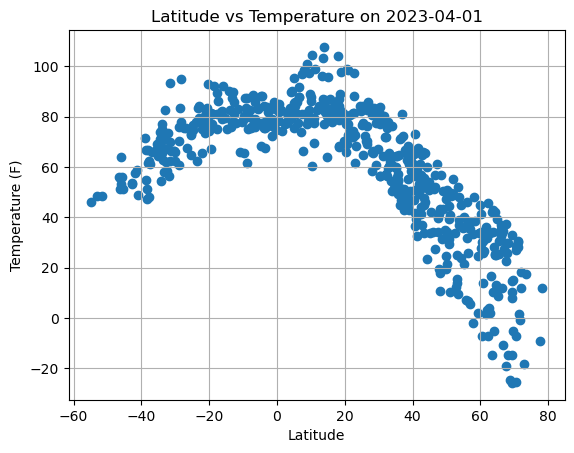

In [13]:
# Import datetime module
from datetime import datetime

# Build scatter plot for latitude vs. temperature
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

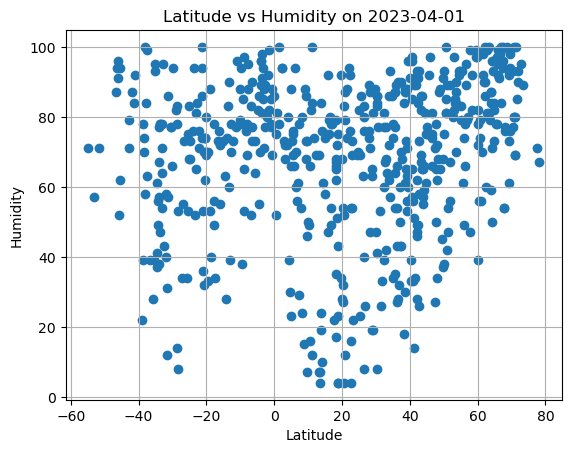

In [14]:
# Build the scatter plots for latitude vs. humidity

endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Humidity on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

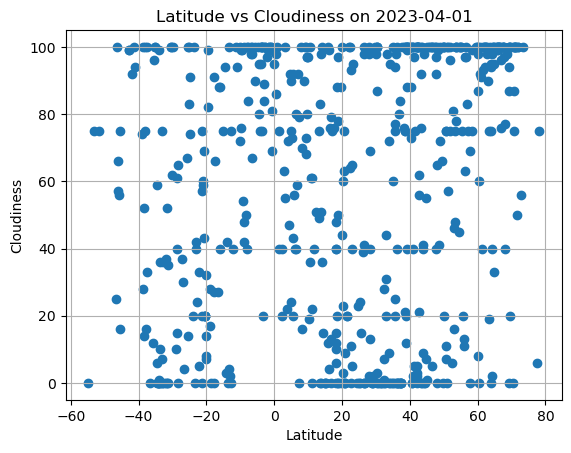

In [15]:
# Build the scatter plots for latitude vs. cloudiness
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

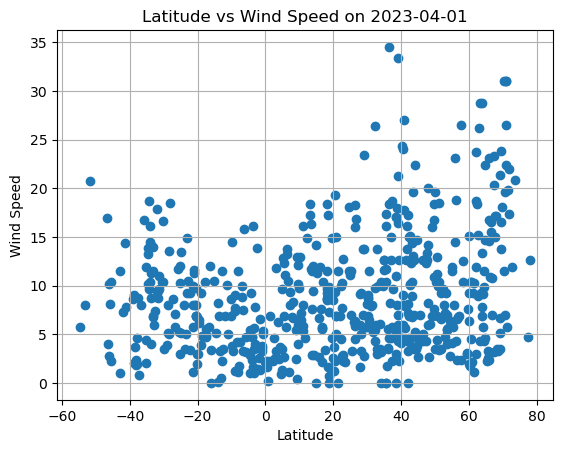

In [16]:
# Build the scatter plots for latitude vs. wind speed
endRunDate = city_data_df["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Wind Speed on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    print(f'The r-square is {rvalue}')
    print(line_eq)
    
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

Northern_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
Northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,bethel,41.3712,-73.4140,59.09,89,100,12.66,US,1680362566
5,husavik,66.0449,-17.3389,36.72,97,99,2.35,IS,1680362658
7,port blair,11.6667,92.7500,82.44,74,40,4.61,IN,1680362659
9,kommunisticheskiy,61.6789,64.4819,36.28,92,100,10.31,RU,1680362660
11,albany,42.6001,-73.9662,56.89,93,100,10.02,US,1680362588


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,middelburg,-25.7751,29.4648,75.11,34,67,11.72,ZA,1680362405
1,tuatapere,-46.1333,167.6833,53.38,96,57,10.18,NZ,1680362656
3,saint-philippe,-21.3585,55.7679,80.19,86,57,9.91,RE,1680362657
4,codrington,-38.2667,141.9667,51.03,74,14,2.33,AU,1680362657
6,bambous virieux,-20.3428,57.7575,80.85,74,20,6.91,MU,1680362658


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8791390182740245
y = -1.23x + 100.57


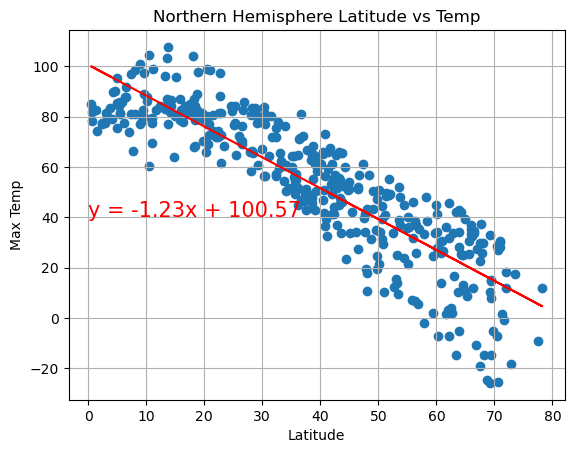

In [33]:
# Linear regression on Northern Hemisphere

x_values = Northern_df["Lat"]
y_values = Northern_df["Max Temp"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "Max Temp"

#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig('Northern_Hem_Temp.png')
plt.show()

The r-square is 0.6862080965468669
y = 0.54x + 85.3


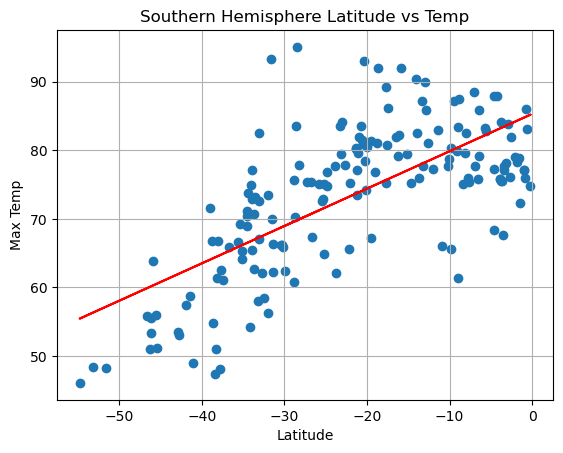

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "Max Temp"

#give the title
plt.title(f'Southern Hemisphere Latitude vs Temp')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig('Southern_Hem_Temp.png')
plt.show()

**Discussion about the linear relationship:** The closest we get to latitude 0 (the Equator) the higher the temperature gets.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.37565195824476544
y = 0.44x + 51.0


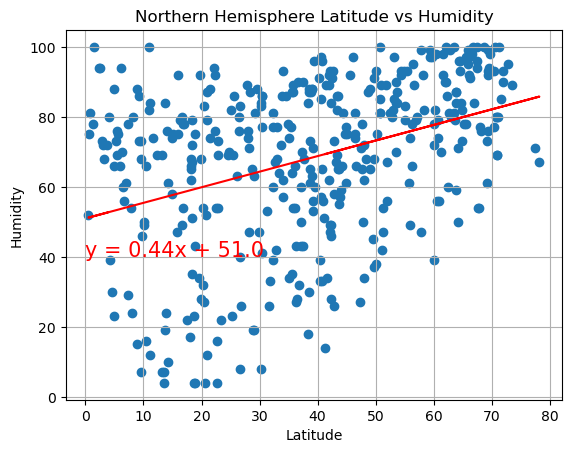

In [34]:
# Northern Hemisphere
x_values = Northern_df["Lat"]
y_values = Northern_df["Humidity"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "Humidity"

#give the title
plt.title(f'Northern Hemisphere Latitude vs Humidity')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig('Northern_Hem_Humidity.png')
plt.show()

The r-square is 0.22759899836310218
y = 0.33x + 77.31


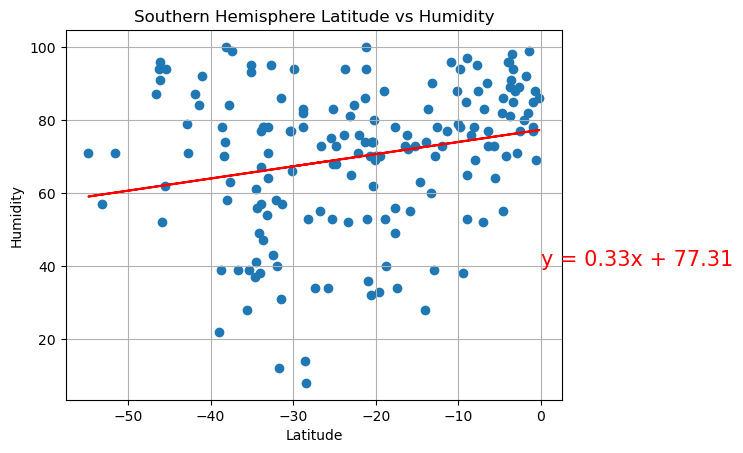

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "Humidity"

#give the title
plt.title(f'Southern Hemisphere Latitude vs Humidity')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig('Southern_Hem_Humidity.png')
plt.show()

**Discussion about the linear relationship:** The closest to the Equator (latitude 0) the more humity it gets. As we can see in the graphics above, the Northern hemisphere has a r-squared above 0.3, but below 0.5, which shows a weak correction between humidity and latitude. Whereas, the Southern shows a r-squared below 0.3, which means none or weak relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.27489261298847656
y = 0.55x + 38.11


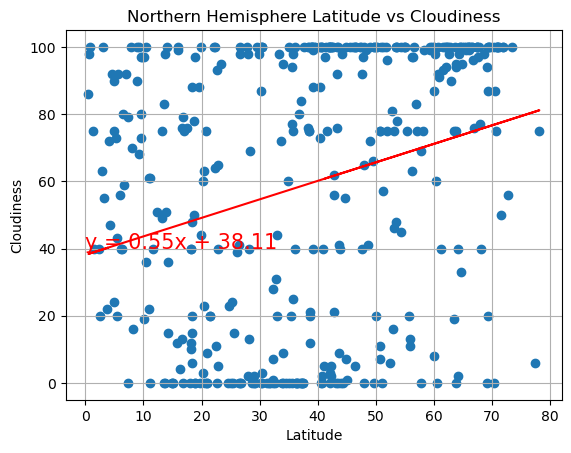

In [36]:
# Northern Hemisphere
x_values = Northern_df["Lat"]
y_values = Northern_df["Cloudiness"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "Cloudiness"

#give the title
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig('Northern_Hem_Cloudiness.png')
plt.show()

The r-square is 0.3327139976874736
y = 0.93x + 76.98


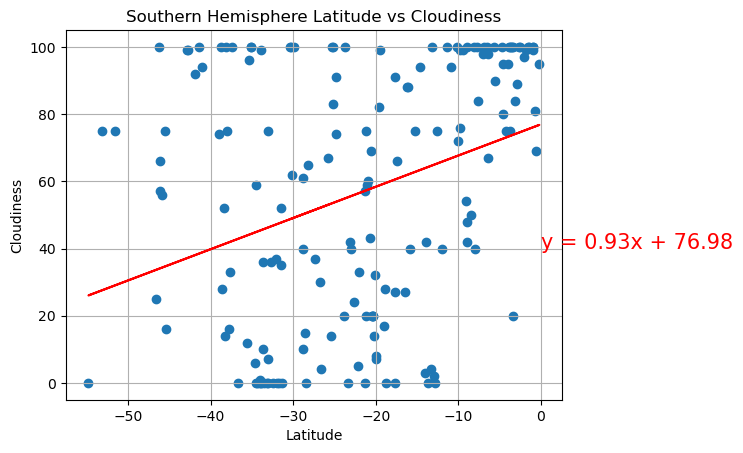

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "Cloudiness"

#give the title
plt.title(f'Southern Hemisphere Latitude vs Cloudiness')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig('Southern_Hem_Cloudiness.png')
plt.show()

**Discussion about the linear relationship:** As we can see in the graphics above, the Southern hemisphere has a r-squared above 0.3, but below 0.5, which shows a weak correction between cloudiness and latitude. Whereas, the Nothern shows a r-squared below 0.3, which means none or weak relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.27721291687225336
y = 0.09x + 6.1


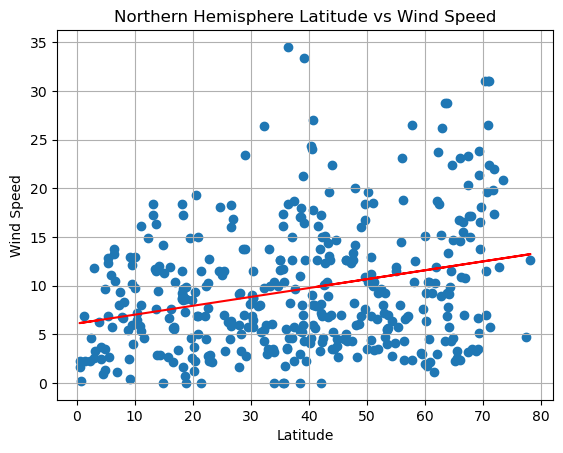

In [38]:
# Northern Hemisphere
x_values = Northern_df["Lat"]
y_values = Northern_df["Wind Speed"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "Wind Speed"

#give the title
plt.title(f'Northern Hemisphere Latitude vs Wind Speed')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig('Northern_Hem_Wind Speed.png')
plt.show()

The r-square is -0.31406068376346324
y = -0.1x + 5.03


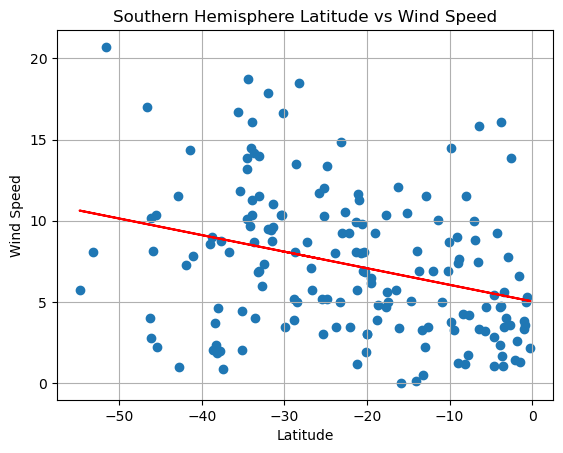

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "Wind Speed"

#give the title
plt.title(f'Southern Hemisphere Latitude vs Wind Speed')

#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig('Southern_Hem_WindSpeed.png')
plt.show()

**Discussion about the linear relationship:**  As we can see in the graphics above, the Southern hemisphere has a r-squared above 0.3, but below 0.5, which shows a weak correction between wind speed and latitude. Whereas, the Nothern shows a r-squared below 0.3, which means none or weak relationship. 